In [1]:
import pandas as pd
df=pd.read_csv("C:\jupython\(공모전)환경데이터공모전\최종\결과값\전체지역\제주도_격자_total.csv")
df.head()

,gid,center_lat,center_lon,Usage,Usage_n,Dist,Dist_n,Pop,Pop_n,Pop_s,...,c,c_n,d,d_n,e,e_n,f,f_n,Weight,geometry
0,나나73b80b,873750.0,1480750.0,0.0,0.0,1914.485875,0.041283,0.000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,"POLYGON ((873500 1480500, 873500 1481000, 8740..."
1,나나74a80a,874250.0,1480250.0,0.0,0.0,1401.152434,0.030207,0.000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,"POLYGON ((874000 1480000, 874000 1480500, 8745..."
2,나나74a80b,874250.0,1480750.0,0.0,0.0,1423.466728,0.030688,0.000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.002088,0.001149,"POLYGON ((874000 1480500, 874000 1481000, 8745..."
3,나나74a81a,874250.0,1481250.0,0.0,0.0,1609.190527,0.034696,0.000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,"POLYGON ((874000 1481000, 874000 1481500, 8745..."
4,나나74b80a,874750.0,1480250.0,0.0,0.0,907.982573,0.019565,2.135,0.000167,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000015,"POLYGON ((874500 1480000, 874500 1480500, 8750..."


In [2]:
df.info() # 변수 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7858 entries, 0 to 7857
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   gid         7858 non-null   object 
 1   center_lat  7858 non-null   float64
 2   center_lon  7858 non-null   float64
 3   Usage       7858 non-null   float64
 4   Usage_n     7858 non-null   float64
 5   Dist        7858 non-null   float64
 6   Dist_n      7858 non-null   float64
 7   Pop         7858 non-null   float64
 8   Pop_n       7858 non-null   float64
 9   Pop_s       7858 non-null   float64
 10  Pop_s_n     7858 non-null   float64
 11  build       7858 non-null   float64
 12  build_n     7858 non-null   float64
 13  a           7858 non-null   float64
 14  a_n         7858 non-null   float64
 15  b           7858 non-null   float64
 16  b_n         7858 non-null   float64
 17  c           7858 non-null   float64
 18  c_n         7858 non-null   float64
 19  d           7858 non-null  

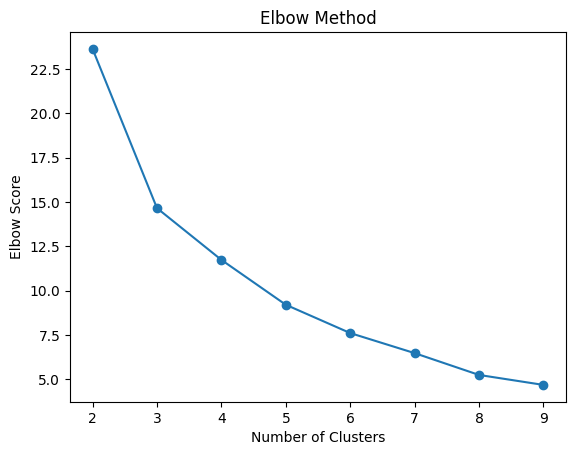

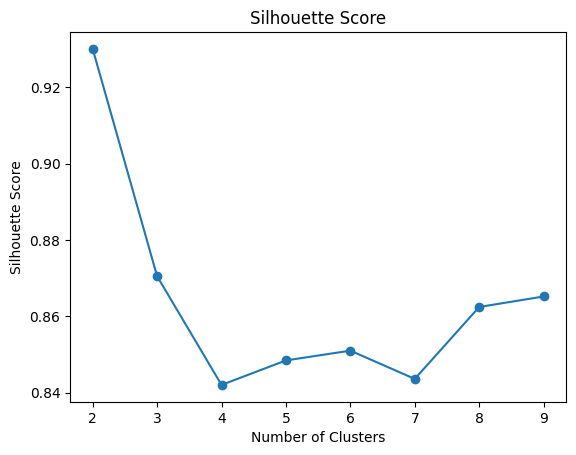

In [3]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# 클러스터링에 사용할 특성(변수) 리스트 정의
features = ['b_n', 'Pop_n', 'f_n']

# 특성 데이터 추출
data = df[features]

# 클러스터 개수 범위 설정
cluster_range = range(2, 10)
elbow_scores = []
silhouette_scores = []

# 클러스터 개수에 따른 클러스터링 수행 및 평가
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, n_init=10)
    kmeans.fit(data)
    clusters = kmeans.predict(data)
    elbow_scores.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data, clusters))

# Elbow Method를 이용한 최적의 클러스터 개수 탐색
plt.plot(cluster_range, elbow_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Elbow Score')
plt.title('Elbow Method')
plt.show()

# Silhouette Score를 이용한 최적의 클러스터 개수 탐색
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.show()

In [4]:
from sklearn.cluster import KMeans

# 클러스터링에 사용할 특성(변수) 리스트 정의
features = ['b_n', 'Pop_n', 'f_n']

# 특성 데이터 추출
data = df[features]

# K-means 클러스터링 객체 생성
kmeans = KMeans(n_clusters=5, n_init=10)

# 데이터를 이용하여 클러스터링 수행
kmeans.fit(data)

# 클러스터링 결과 예측
clusters = kmeans.predict(data)

# 클러스터 레이블을 데이터프레임에 추가
df['관광지'] = clusters

In [5]:
df['관광지'].value_counts()

0    6826
3     855
2      82
1      78
4      17
Name: 관광지, dtype: int64

In [6]:
from sklearn.metrics import silhouette_score

# 클러스터링 결과 데이터와 특성 데이터 준비
clusters = df['관광지']  # 클러스터링 결과
data = df[features]  # 특성 데이터

# 실루엣 점수 계산
silhouette_avg = silhouette_score(data, clusters)

print("실루엣 점수:", silhouette_avg)

실루엣 점수: 0.8479789054730831


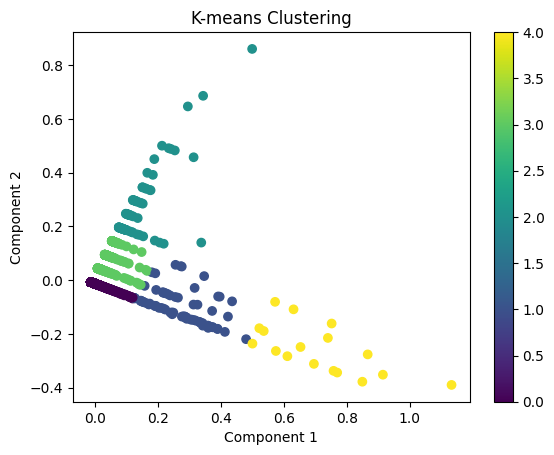

In [7]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# 2차원으로 축소
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data)

# 클러스터 시각화
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=clusters)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('K-means Clustering')
plt.colorbar()
plt.show()

In [8]:
# 각 클러스터의 특징을 분석하기 위해 클러스터링된 데이터를 그룹화합니다.
cluster_features = df.groupby('관광지')[['b_n', 'Pop_n', 'f_n']].mean()

# 각 클러스터의 크기를 계산합니다.
cluster_sizes = df['관광지'].value_counts()

# 각 클러스터별로 특징을 출력합니다.
for cluster, features in cluster_features.iterrows():
    print(f"Cluster {cluster}:")  # 클러스터 번호 출력
    print(f"Cluster Size: {cluster_sizes[cluster]}")  # 클러스터 크기 출력
    print("Cluster Features:")  # 클러스터의 변수별 특징 출력
    for feature, value in features.items():
        print(f"- {feature}: {value}")  # 변수명과 해당 변수의 평균값 출력
    print("--------------------")


Cluster 0:
Cluster Size: 6826
Cluster Features:
- b_n: 0.0
- Pop_n: 0.0026950556424027027
- f_n: 0.002482219831211512
--------------------
Cluster 1:
Cluster Size: 78
Cluster Features:
- b_n: 0.027065527065527152
- Pop_n: 0.13241119366558932
- f_n: 0.25772174937101866
--------------------
Cluster 2:
Cluster Size: 82
Cluster Features:
- b_n: 0.3116531165311652
- Pop_n: 0.011244470352966586
- f_n: 0.025434085238555965
--------------------
Cluster 3:
Cluster Size: 855
Cluster Features:
- b_n: 0.07608836907082553
- Pop_n: 0.00489547637549117
- f_n: 0.007334969295193479
--------------------
Cluster 4:
Cluster Size: 17
Cluster Features:
- b_n: 0.062091503267974
- Pop_n: 0.44447153139399653
- f_n: 0.6213926071472431
--------------------


In [9]:
관광지데이터프레임=df.query("관광지==1|관광지==2|관광지==3|관광지==4")[["gid","center_lat","center_lon","관광지"]]

In [10]:
관광지데이터프레임["관광지"].value_counts().sum()

1032

In [11]:
관광지데이터프레임.head()

,gid,center_lat,center_lon,관광지
2,나나74a80b,874250.0,1480750.0,3
12,나나75b78a,875750.0,1478250.0,3
13,나나75b78b,875750.0,1478750.0,3
14,나나75b79a,875750.0,1479250.0,3
15,나나75b79b,875750.0,1479750.0,3


In [12]:
관광지데이터프레임.to_csv("관광지만.csv",index=False)